# NASDAQ Momentum Based Trading Strategy

## Get NASDAQ Yearly Returns and Stock Symbols

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import date
from datetime import datetime
import pandas as pd
from pandas.tseries.offsets import Day
import numpy as np
import requests
import json
import os
plt.style.use('ggplot')

headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/92.0.4315.107 Safari/537.36"}

result = requests.get("https://api.nasdaq.com/api/quote/list-type/nasdaq100", headers=headers)

In [2]:
nasdaq_stocks = pd.DataFrame(result.json()['data']['data']['rows'])['symbol'].unique().tolist()
nasdaq_stocks

['CPRT',
 'COST',
 'AAPL',
 'AMGN',
 'CMCSA',
 'INTC',
 'KLAC',
 'PCAR',
 'CTAS',
 'PAYX',
 'LRCX',
 'ADSK',
 'ROST',
 'MNST',
 'MSFT',
 'ADBE',
 'FAST',
 'EA',
 'CSCO',
 'REGN',
 'IDXX',
 'VRTX',
 'BIIB',
 'ODFL',
 'QCOM',
 'GILD',
 'SNPS',
 'SBUX',
 'SIRI',
 'INTU',
 'MCHP',
 'ORLY',
 'DLTR',
 'ASML',
 'ANSS',
 'TTWO',
 'CTSH',
 'CSGP',
 'NVDA',
 'BKNG',
 'ON',
 'ISRG',
 'MRVL',
 'ILMN',
 'ADI',
 'AEP',
 'AMD',
 'CDNS',
 'CSX',
 'HON',
 'MU',
 'XEL',
 'EXC',
 'PEP',
 'ROP',
 'TXN',
 'WBA',
 'MDLZ',
 'NFLX',
 'GOOGL',
 'DXCM',
 'TMUS',
 'MELI',
 'AVGO',
 'VRSK',
 'FTNT',
 'CHTR',
 'TSLA',
 'NXPI',
 'SPLK',
 'FANG',
 'META',
 'PANW',
 'WDAY',
 'CDW',
 'GOOG',
 'PYPL',
 'KHC',
 'TEAM',
 'CCEP',
 'BKR',
 'MDB',
 'ZS',
 'PDD',
 'MRNA',
 'CRWD',
 'DDOG',
 'KDP',
 'GFS',
 'TTD',
 'DASH',
 'CEG',
 'GEHC',
 'AMZN',
 'ABNB',
 'AMAT',
 'AZN',
 'LULU',
 'WBD',
 'ADP',
 'MAR']

In [3]:
end_date = date.today()

start_date = end_date - pd.DateOffset(365*10)

prices_df = yf.download(tickers=nasdaq_stocks, start=start_date, end=end_date)

prices_df = prices_df.stack()

prices_df['yearly_return'] = prices_df.groupby(level=1)['Adj Close'].transform(lambda x: x.pct_change(252))

# prices_df.xs('TSLA', level=1)['yearly_return'].plot()

prices_df.index.names = ['Date', 'symbol']

prices_df


[*********************100%%**********************]  101 of 101 completed


Price               Adj Close       Close        High         Low        Open  \
Date       symbol                                                               
2014-02-24 AAPL     16.595505   18.841070   18.925714   18.657858   18.683929   
           ADBE     68.769997   68.769997   69.279999   68.000000   68.540001   
           ADI      40.892891   50.959999   51.610001   50.950001   51.290001   
           ADP      54.141712   67.427567   68.024582   66.900787   66.997368   
           ADSK     54.470001   54.470001   55.980000   54.450001   55.400002   
...                       ...         ...         ...         ...         ...   
2024-02-21 WBA      21.750000   21.750000   21.870001   21.400000   21.700001   
           WBD       9.570000    9.570000    9.950000    9.530000    9.930000   
           WDAY    298.959991  298.959991  299.549988  294.679993  299.549988   
           XEL      59.810001   59.810001   60.169998   59.380001   59.730000   
           ZS      213.919998  213.919998  216.505005  202.440002  213.000000   

Price                   Volume  yearly_return  
Date       symbol                              
2014-02-24 AAPL    288909600.0            NaN  
           ADBE      2811700.0            NaN  
           ADI       2096300.0            NaN  
           ADP       1967281.0            NaN  
           ADSK      4212900.0            NaN  
...                        ...            ...  
2024-02-21 WBA      15237000.0      -0.366945  
           WBD      25976100.0      -0.379780  
           WDAY      1224400.0       0.609042  
           XEL       3579100.0      -0.090483  
           ZS        7801300.0       0.616320  

[235753 rows x 7 columns]

In [4]:
yearly_data = prices_df.reset_index(level=1).groupby([pd.Grouper(freq='1Y'), 'symbol'])['yearly_return'].last().to_frame()

yearly_data['rank'] = yearly_data.groupby(level=0)['yearly_return'].transform(lambda x: x.rank(ascending=False))

yearly_data.xs('2023-12-31',level=0).sort_values('yearly_return')

,yearly_return,rank
symbol,,
MRNA,-0.436544,101.0
ILMN,-0.270269,100.0
WBA,-0.255236,99.0
EXC,-0.133823,98.0
AEP,-0.113590,97.0
...,...,...
TSLA,1.204596,5.0
AMD,1.355921,4.0
CRWD,1.554222,3.0


### Filter Top 5 Yearly Companies by Momentum Rank

In [5]:
filtered_df = yearly_data[yearly_data['rank']<6]

filtered_df.head(20)

yearly_return  rank
Date       symbol                     
2015-12-31 AMZN         1.177831   2.0
           DXCM         0.487738   4.0
           NFLX         1.343784   1.0
           NVDA         0.671156   3.0
           SBUX         0.482113   5.0
2016-12-31 AMAT         0.757024   3.0
           AMD          2.951220   1.0
           IDXX         0.608201   4.0
           MRVL         0.605352   5.0
           NVDA         2.269603   2.0
2017-12-31 MELI         0.989737   3.0
           MU           0.846430   5.0
           TEAM         0.876340   4.0
           TTWO         1.214199   1.0
           VRTX         1.013165   2.0
2018-12-31 AMD          0.749763   5.0
           DXCM         1.089656   3.0
           MDB          1.769180   1.0
           TEAM         0.932667   4.0
           TTD          1.500215   2.0

### Move Index Forward 1 Day

In [6]:
filtered_df.head()
filtered_df = filtered_df.reset_index(level=1)


In [7]:
filtered_df.index = filtered_df.index + Day()

filtered_df.reset_index()

,Date,symbol,yearly_return,rank
0,2016-01-01,AMZN,1.177831,2.0
1,2016-01-01,DXCM,0.487738,4.0
2,2016-01-01,NFLX,1.343784,1.0
3,2016-01-01,NVDA,0.671156,3.0
4,2016-01-01,SBUX,0.482113,5.0
5,2017-01-01,AMAT,0.757024,3.0
6,2017-01-01,AMD,2.951220,1.0
7,2017-01-01,IDXX,0.608201,4.0
8,2017-01-01,MRVL,0.605352,5.0
9,2017-01-01,NVDA,2.269603,2.0


### Create dict with dates as keys

In [8]:
# dates = filtered_df.index.get_level_values('Date').unique().tolist()

fixed_dates = {}

for date, group in filtered_df.groupby('Date'):
    
    fixed_dates[date] = group.values.tolist()


# for d in dates:
    
#     fixed_dates[d.strftime('%Y-%m-%d')] - filtered_df.xs(d,level=0).index.tolist()

fixed_dates = {date.strftime('%Y-%m-%d'): value for date, value in fixed_dates.items()}
    
fixed_dates

{'2016-01-01': [['AMZN', 1.1778313909946103, 2.0],
  ['DXCM', 0.48773846795519127, 4.0],
  ['NFLX', 1.3437837342634666, 1.0],
  ['NVDA', 0.6711558890855569, 3.0],
  ['SBUX', 0.4821129508938957, 5.0]],
 '2017-01-01': [['AMAT', 0.7570240593854551, 3.0],
  ['AMD', 2.9512197229160635, 1.0],
  ['IDXX', 0.6082007623117107, 4.0],
  ['MRVL', 0.6053522232672561, 5.0],
  ['NVDA', 2.269603459573168, 2.0]],
 '2018-01-01': [['MELI', 0.9897365525391635, 3.0],
  ['MU', 0.8464299526070644, 5.0],
  ['TEAM', 0.8763396549177085, 4.0],
  ['TTWO', 1.2141991675065977, 1.0],
  ['VRTX', 1.0131649072460798, 2.0]],
 '2019-01-01': [['AMD', 0.7497629147613143, 5.0],
  ['DXCM', 1.0896563618608535, 3.0],
  ['MDB', 1.769179844496842, 1.0],
  ['TEAM', 0.9326672803545581, 4.0],
  ['TTD', 1.5002153060406904, 2.0]],
 '2020-01-01': [['AMD', 1.4842905138021374, 1.0],
  ['KLAC', 1.039876698898273, 4.0],
  ['LRCX', 1.193334952078572, 3.0],
  ['MELI', 0.9530134557662904, 5.0],
  ['TTD', 1.2383250698266925, 2.0]],
 '2021-01-0

### Build Portfolio and Calculate Average Yearly Return

In [9]:
returns_df = prices_df['Adj Close'].unstack().pct_change()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)+pd.DateOffset(365)).strftime('%Y-%m-%d')
    
    cols = [col[0] for col in fixed_dates[start_date]]
    
    temp_df = returns_df[start_date:end_date][cols].dropna().mean(axis=1).to_frame('Portfolio Return')
    
    portfolio_df = pd.concat([portfolio_df,temp_df])
                             
portfolio_df.index.name = 'Date'

portfolio_df

,Portfolio Return
Date,
2016-01-04,-0.037044
2016-01-05,0.005148
2016-01-06,0.004818
2016-01-07,-0.019951
2016-01-08,-0.015687
...,...
2024-02-14,0.031590
2024-02-15,0.009558
2024-02-16,-0.009610


Text(0, 0.5, 'Return')

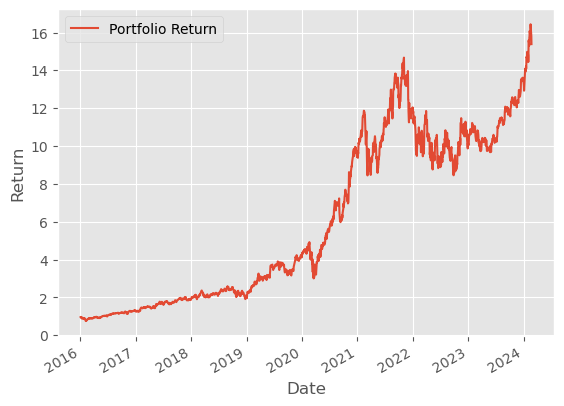

In [10]:
portfolio_cummulative_return = np.exp(np.log1p(portfolio_df).cumsum())

portfolio_cummulative_return.plot()

plt.title('')

plt.ylabel('Return')



### Compare with NASDAQ Returns

In [11]:
qqq_df = yf.download(tickers='QQQ',start=portfolio_cummulative_return.index.min(),end=portfolio_cummulative_return.index.max())

qqq_df['NASDAQ Return'] = qqq_df['Adj Close'].pct_change()

final_df = portfolio_df.merge(qqq_df[['NASDAQ Return']],left_index=True,right_index=True).dropna()

final_df

[*********************100%%**********************]  1 of 1 completed


,Portfolio Return,NASDAQ Return
Date,,
2016-01-05,0.005148,-0.001735
2016-01-06,0.004818,-0.009605
2016-01-07,-0.019951,-0.031314
2016-01-08,-0.015687,-0.008200
2016-01-11,0.010018,0.003077
...,...,...
2024-02-13,-0.008161,-0.015597
2024-02-14,0.031590,0.010897
2024-02-15,0.009558,0.002978


<Axes: xlabel='Date'>

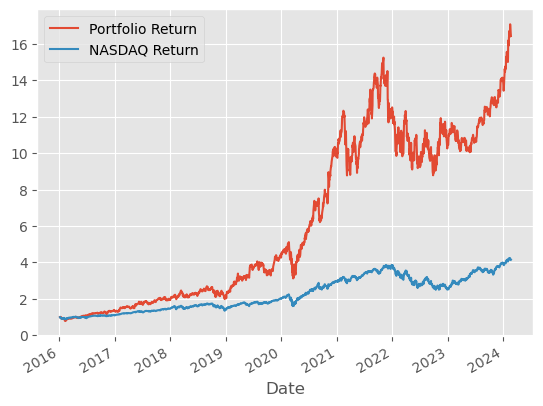

In [12]:
portfolio_cummulative_return = np.exp(np.log1p(final_df).cumsum())

portfolio_cummulative_return.plot()